In [3]:
import numpy as np
import os.path
import matplotlib.pyplot as plt
import sys
import datetime
import matplotlib.cm as cm
import csv

import time

import sklearn
from scipy import stats
import sklearn.semi_supervised
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

import argparse

import random
from sklearn.metrics import f1_score

In [4]:

#########################

# number of multiprobe
num_multi = 1

# point size of phase diagram
p_size = 25

# initial number
initial_num = 10

# iteration number
itt_num = 100

# indipendent number
ind_num = 10

# method for multi
#0: only ranking, 1:combination, 2:distance, 3:look-ahead
multi_method = 0


#########################

random.seed(1)

In [6]:
input_data = 'data.csv'
f = open(input_data, 'r')

In [7]:
ternary_data_list = []

label_list_true = []

data_list = []

data_list2d = []

co_num=[]
label_list_text = []
reader = csv.reader(f)
for row in reader:
    label_list_text.append(row[0])
    data_list.append([float(row[1]),float(row[2])])
    data_list2d.append([float(row[1]),float(row[2])])

In [9]:
existed_phase=list(set(label_list_text))
existed_phase.sort()


for i in range(len(label_list_text)):

    for j in range(len(existed_phase)):

        if label_list_text[i]==existed_phase[j]:

            label_list_true.append(j)

    co_num.append(label_list_text[i].count("+")+1)


total_index_list = [i for i in range(len(label_list_true))]



f1_res_tot = []

num_phase_res_tot = []

num_data_res_tot = []

max_label = len(existed_phase)
color_list = [cm.rainbow(float(i)/(max_label)) for i in range(max_label+1)]

In [10]:
#初期点，选几个出来作为标记点
labeled_index_list = random.sample(total_index_list, initial_num)

In [56]:
labeled_index_list


[68, 291, 391, 32, 130, 60, 253, 389, 230, 241]

In [13]:
#未标记点
unlabeled_index_list = list(set(total_index_list) - set(labeled_index_list))

In [11]:
labeled_index_list

[68, 291, 391, 32, 130, 60, 253, 389, 230, 241]

In [14]:
        # f1_res = []

        # num_phase_res = []

        # num_data_res = []

In [15]:
        # for itt in range(itt_num):


        #     print("*************************")
        #     print("independent run =", ind)
        #     print("iteration =", itt)

num_training = len(labeled_index_list)

print("number of training data =", num_training)

number of training data = 10


In [16]:
label_list = []

for i in range(len(label_list_true)):
    if i in labeled_index_list:
        label_list.append(label_list_true[i])

    else:
        label_list.append(-1)

In [17]:
label_train = np.copy(label_list)

In [21]:
len(data_list)

400

In [57]:
label_train[labeled_index_list]

array([1, 2, 2, 1, 2, 1, 0, 2, 2, 0])

In [64]:
data_list2d[labeled_index_list].T[0]

array([0.42105263, 0.57894737, 0.57894737, 0.63157895, 0.52631579,
       0.        , 0.68421053, 0.47368421, 0.52631579, 0.05263158])

In [ ]:
u_score_list

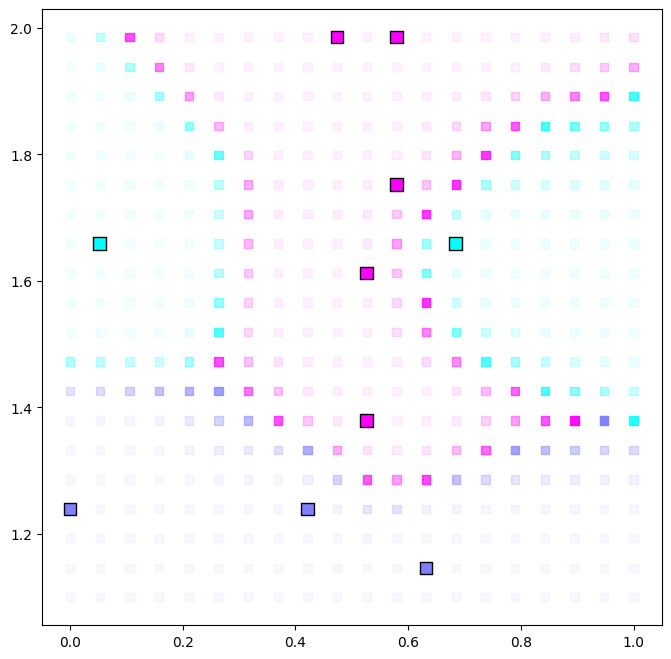

In [180]:
plt.figure(figsize=(8,8))
plt.scatter(data_list2d[unlabeled_index_list].T[0],data_list2d[unlabeled_index_list].T[1],alpha=u_score_list*1.5+0.05,c=predicted_labels,cmap='cool', marker='s' )
plt.scatter(data_list2d[labeled_index_list].T[0],data_list2d[labeled_index_list].T[1], c=label_train[labeled_index_list],cmap='cool',marker='s',edgecolors="black",s=80 )
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(data_list2d[unlabeled_index_list].T[0],data_list2d[unlabeled_index_list].T[1],c=u_score_list,cmap='Blues', marker='s' )
plt.scatter(data_list2d[labeled_index_list].T[0],data_list2d[labeled_index_list].T[1], c=label_train[labeled_index_list],cmap='cool',marker='s' )
plt.show()

In [23]:
dimension = len(data_list[0])

In [25]:
## 好像差不多?
data_list = np.array(data_list)
data_list2d = np.array(data_list2d)


In [29]:
color_list = [cm.rainbow(float(i)/(max_label)) for i in range(max_label+1)]

In [31]:
# scaling
ss = StandardScaler()
ss.fit(data_list)
data_list_std = ss.transform(data_list)

In [ ]:
output_rank = True
multi_uncertainty_index,label_distributions,u_score_list,ranking,predicted_all_labels \
= sampling(label_train,labeled_index_list,unlabeled_index_list)
#output_rank = True

In [34]:
###########
## 第一步，选择算法
# if LP_algorithm == 'LS':
#     lp_model = sklearn.semi_supervised.LabelSpreading()
# elif LP_algorithm == 'LP':
#     lp_model = sklearn.semi_supervised.LabelPropagation()
lp_model = sklearn.semi_supervised.LabelSpreading()

In [35]:
lp_model.fit(data_list_std, label_train)

LabelSpreading()

In [36]:
#预测无标签的东西的标签
predicted_labels = lp_model.transduction_[unlabeled_index_list]


In [38]:
#搞一下全数据的标签
predicted_all_labels = lp_model.transduction_

In [40]:
label_distributions = lp_model.label_distributions_[unlabeled_index_list]
label_distributions_all = lp_model.label_distributions_

In [44]:
len(predicted_all_labels)

400

In [43]:
label_distributions.shape

(390, 3)

In [47]:
#目前获取的标签
classes = lp_model.classes_
classes

array([0, 1, 2])

In [49]:
u_score_list = 1 - np.max(label_distributions, axis = 1)

# most uncertain point
uncertainty_index = [unlabeled_index_list[np.argmax(u_score_list)]]
US_point_prob = label_distributions[np.argmax(u_score_list)]

# all ranking of uncertain point
ranking = np.array(u_score_list).argsort()[::-1]
multi_uncertainty_index = [unlabeled_index_list[ranking[i]] for i in range(len(unlabeled_index_list))]

In [100]:
len(u_score_list)

390

In [ ]:
#multi_uncertainty_index,label_distributions,u_score_list,ranking,predicted_all_labels

In [55]:
# #calculate Uncertainly Score
# if US_strategy == 'E':
#     pred_entropies = stats.distributions.entropy(label_distributions.T)
#     u_score_list = pred_entropies/np.max(pred_entropies)
        
#     # most uncertain point
#     uncertainty_index = [unlabeled_index_list[np.argmax(u_score_list)]]
#     US_point_prob = label_distributions[np.argmax(u_score_list)]

#     # all ranking of uncertain point
#     ranking = np.array(u_score_list).argsort()[::-1]
#     multi_uncertainty_index = [unlabeled_index_list[ranking[i]] for i in range(len(unlabeled_index_list))]

In [113]:
num_multi

1

In [114]:
US_point = multi_uncertainty_index[0:num_multi]

print(US_point)

[138]


In [126]:
u_score_list[134]

0.6173133088762603

In [124]:
unlabeled_index_list[134]

138

In [121]:
u_score_list.max()

0.6173133088762603

In [122]:
ranking = np.array(u_score_list).argsort()[::-1]

In [127]:
#将index按照uscore从大到小排列
ranking[:30]

array([134, 133, 135, 285, 208, 306, 265, 141, 351, 112,  89, 328, 161,
       374, 152, 124, 350, 132, 170, 181,  87, 327, 105, 151, 297, 111,
       140, 142, 123, 329], dtype=int64)

In [130]:
unlabeled_index_list[138]

142

In [141]:
len(ranking)

390

In [156]:
unlabeled_index_list.index(138)

134

In [128]:
 multi_uncertainty_index = [unlabeled_index_list[ranking[i]] for i in range(len(unlabeled_index_list))]

In [133]:
len(multi_uncertainty_index)

390

In [136]:
multi_uncertainty_index[:10]

[138, 137, 139, 293, 212, 314, 272, 145, 359, 115]

In [154]:
u_score_list[138]

0.1876332653508448

In [142]:
US_point = multi_uncertainty_index[0:num_multi]

In [143]:
US_point

[138]

In [150]:
u_score_list[138]

0.1876332653508448

In [146]:
labeled_index_list

[68, 291, 391, 32, 130, 60, 253, 389, 230, 241]

In [151]:
unlabeled_index_list[138]

142

In [183]:
#multi policy 选样本的方法？

f1_score(label_list_true, list(predicted_all_labels), average="macro")

0.6002553654877952